In [26]:
# importing initial dependencies
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [27]:
# reading csv into pd dataframe
file_path = Path("myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [40]:
# removing the "MYOPIC" column from the dataset
df = myopia_df.drop('MYOPIC', axis=1)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [33]:
# Standardize your dataset so that columns that 
# contain larger values do not influence the outcome more than columns with smaller value

# importing scaler dependency 
from sklearn.preprocessing import StandardScaler

# Create a scaler to standardize the data
scaler = StandardScaler()

# Train the scaler with the data.
X_scaled = scaler.fit_transform(df)

In [34]:
# perform dimensionality reduction with PCA. How did the number of the features change?
#importing PCA dependencies
from sklearn.decomposition import PCA

# setting pca components to 90% 
pca = PCA(n_components=0.9)

# Get the principal components for the X_train_scaled
df_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [46]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results
# To do this, run t-SNE on the principal components, which is the 
# output of the PCA transformation.

# importing t-SNE 
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate='auto')

#running it on the df_pca
df_tsne = tsne.fit_transform(df_pca)


C:\Users\marin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


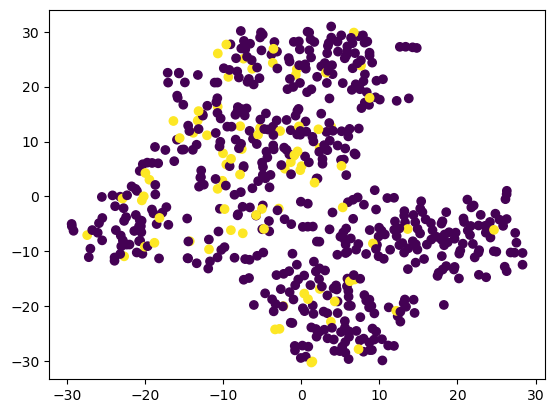

In [48]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?
# first import dependency 
import matplotlib.pyplot as plt

# then get the shape/num of features which is 2
df_tsne.shape

# now prepare to plot the dataset

# define the labels
labels = myopia_df["MYOPIC"]
# The first column of transformed features
df['x'] = df_tsne[:,0]

# The second column of transformed features
df['y'] = df_tsne[:,1]

# Visualize the clusters
plt.scatter(df['x'], df['y'], c=labels)
plt.show()

C:\Users\marin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\marin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\marin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\marin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

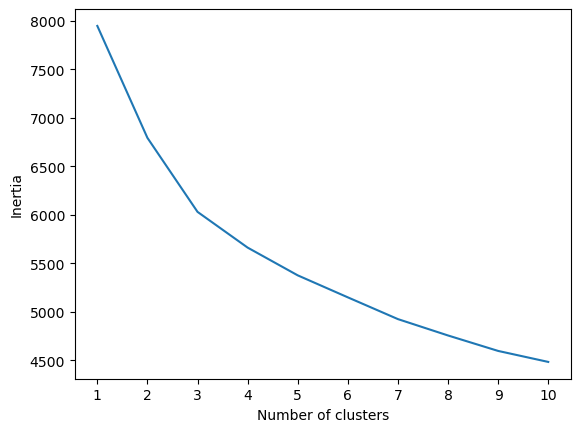

In [64]:
# importing k means dependency 
from sklearn.cluster import KMeans

# setting list
inertia = []

# definine k as list between 1 and 10
k = list(range(1,11))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



In [92]:
# determine where elbow is  and at which value of k it appears
df_myopic = pd.DataFrame(data=df_pca, columns=['1','2','3','4','5','6','7','8','9','10'])

# creating function to test with k-means model

# # Initialize the k-means model
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data



In [93]:
# test it out with k=3 as that seems to be pretty good
clusters = get_clusters(3, df_myopic)
clusters


C:\Users\marin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1
...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,0
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,1
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,1
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,0


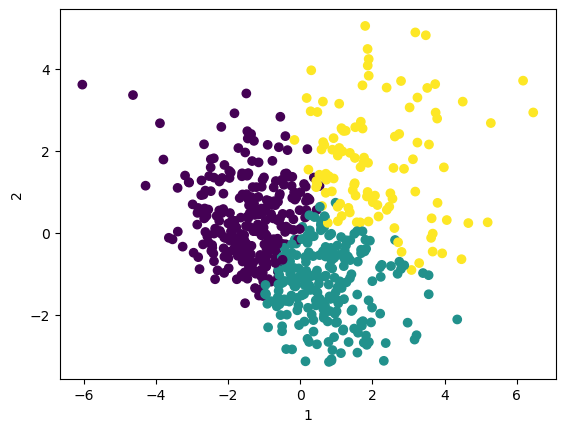

In [95]:
def show_clusters(df_myopic):
    plt.scatter(df_myopic['1'], df_myopic['2'], 
                c=df_myopic['class'])
    plt.xlabel('1')
    plt.ylabel('2')
    plt.show()

show_clusters(clusters)

Based on the data, it appears as though patients can be put into three clusters.